## Correlation, 2X2 tables, and Regression

### Covariance

The **covariance** between two random variables $X$ and $Y$ is computed as 

\begin{align}
    \text{Cov}(X,Y) = E \left\{ \left[X-E(X) \right] \left[Y-E(Y) \right]  \right\}
\end{align}

where $E$ is the expectation.
The **covariance** describes the distance both $X$ and $Y$ vary from their means. 

The covariance is *positive* when samples of $X$ and $Y$ both vary above, or below, their mean respective means. 
The covariance is *negative* when samples of $X$ vary above their mean and samples of $Y$ vary below their mean or vice-versa. 

The covariance, a parameter, is one way to describes the relationship between two different random variables.
To estimate the covariance with the **sample covariance**, a statistic, we need the mean of $X$ ($bar{X}$) and the mean of $Y$ ($\bar{Y}$). 
The covariance can then be estimated from a sample of $N$ pairs $(x_{i},y_{i})$

\begin{align}
    \text{cov}(x,y) = N^{-1}  \sum_{i=1}^{N} \left(x_{i}-\bar{X}\right) \left(y_{i}-\bar{Y}\right)
\end{align}

where $\bar{X} = N^{-1} \sum_{i=1}^{N} x_{i}$ and $\bar{Y} = N^{-1} \sum_{i=1}^{N} y_{i}$. 

Below are three scatterplots where each scatterplot shows $200$ sampled pairs $(x_{i}, y_{i})$ with covariances -2, 0 and 2. 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: covariance is not positive-semidefinite.
  


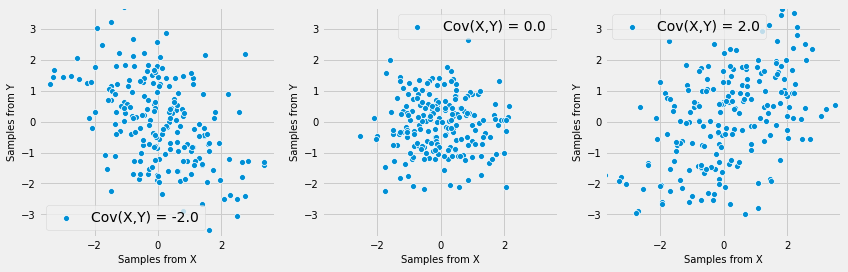

In [35]:
plt.style.use("fivethirtyeight")
fig,axs = plt.subplots(1,3)

covariances = [-2,0,2]

minx,maxX = [],[]
miny,maxY = [],[]

for i in range(3):
    ax = axs[i]
    
    cov = covariances[i]
    
    samples = np.random.multivariate_normal([0,0],[[1,cov],[cov,1]],200)
    x = samples[:,0]
    y = samples[:,1]
    
    minx.append(min(x))
    maxX.append(max(x))
    
    miny.append(min(y))
    maxY.append(max(y))
    
    sns.scatterplot(x,y,ax=ax,label="Cov(X,Y) = {:.1f}".format(cov))
    ax.tick_params(labelsize=10)
    
    ax.set_xlabel("Samples from X",fontsize=10)
    ax.set_ylabel("Samples from Y",fontsize=10)
    
    ax.legend()
    
minv = min( [min(minx), min(miny)] )
maxv = max( [max(maxX), max(maxY)] )

for ax in axs:
    ax.set_xlim(minv,maxv)
    ax.set_ylim(minv,maxv)
    
fig.set_size_inches(12,4)
fig.set_tight_layout(True)


### Correlation

The covariance can measure the association between two random variables, but it is difficult to interpret.
To determine if the association between two variables is strong using the covariance also requires us to understand how $X$ and $Y$ vary by themselves. 
If, for example, the variance of $X$ is 20 and $Y$ is 30 then a covariance of $2$ is not a strong association. 
If instead the variance of $X$ is 0.5 and the variance of $Y$ is 0.25 then the covariance of $2$ is very strong. 
The **correlation** incorporates information about the covariance between two variables $X$ and $Y$ and also eahc individual random variables variance. 

#### Pearson's
The **correlation** between $X$ and $Y$ is computed as 

\begin{align}
    \rho_{X,Y} = \text{corr}\left( X,Y \right) = \dfrac{ \text{cov}(X,Y) }{ \text{Std.}(X) \; \text{Std.}(Y) }
\end{align}

where $\text{cov}(X,Y)$ is the covariance, and $\text{Std.}(X)$ and $\text{Std.}(Y)$ are the standard deviations of $X$ and $Y$. 
This type of correlation is often called [Pearson's](https://en.wikipedia.org/wiki/Karl_Pearson) correlation. 
Pearson's correlation normalizes the covariance: the smallest correlation is -1 and the largest correlation is +1. 
Pearon's correlation *linear* relationships between two random variables---a proportional change in both $X$ from it's mean and $Y$ from it's mean. 

Below are three plots with the same correlation but the variance of $X$ and $Y$ differ. 
The variance of $X$ and $Y$ is 2.5 for the 1st plot, 5.0 for the 2nd plot, and 15 for the 3rd plot.
The correlation for all three samples of $200$ pairs of $(x,y)$ is 0.45.

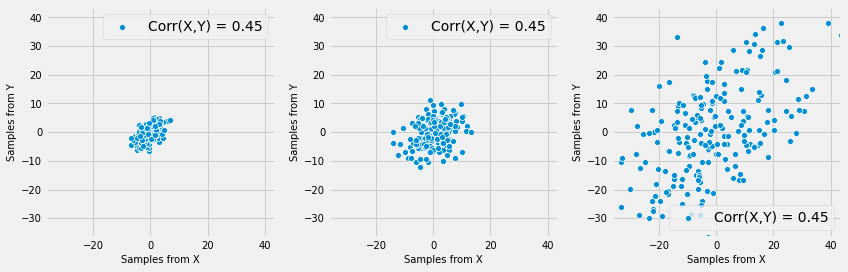

In [34]:
plt.style.use("fivethirtyeight")
fig,axs = plt.subplots(1,3)

stds  = [2.5,5,15]
corrs = [0.45,0.45,0.45]

minx,maxX = [],[]
miny,maxY = [],[]

for i,(std,cor) in enumerate(zip(stds,corrs)):
    ax = axs[i]
    
    samples = np.random.multivariate_normal([0,0],[[ std*std, cor*std*std ],[cor*std*std,std*std]],200)
    x = samples[:,0]
    y = samples[:,1]
    
    minx.append(min(x))
    maxX.append(max(x))
    
    miny.append(min(y))
    maxY.append(max(y))
    
    sns.scatterplot(x,y,ax=ax,label="Corr(X,Y) = {:.2f}".format(cor))
    ax.tick_params(labelsize=10)
    
    ax.set_xlabel("Samples from X",fontsize=10)
    ax.set_ylabel("Samples from Y",fontsize=10)
    
    ax.legend()
    
minv = min( [min(minx), min(miny)] )
maxv = max( [max(maxX), max(maxY)] )

for ax in axs:
    ax.set_xlim(minv,maxv)
    ax.set_ylim(minv,maxv)
    
fig.set_size_inches(12,4)
fig.set_tight_layout(True)

#### Spearmans

One disadvantage of Pearson's correlation is it can only capture relationships thats are linear.
[Spearman's](https://en.wikipedia.org/wiki/Charles_Spearman) correlation is able to assess non-linear relationships between two random variables. 

To compute Spearman's correlation we need to assign ranks to samples of $X$ and separately to samples of $Y$. 
Then we compute Pearson's correlation on the transformed pairs of ranks.
For example, lets look at the data set

\begin{align}
    D = \left[
        \begin{matrix}
            X & Y\\
            \hline
            0.1 & 1\\
            -1  & 0\\
            4.7 & -1.2\\
            2.3 & 20.4\\
        \end{matrix}
        \right]
\end{align}

Rank the $X$ samples and separately the $Y$ samples

\begin{align}
    D = \left[
        \begin{matrix}
            X & Y\\
            \hline
            2 & 3\\
            1  & 2\\
            4 & 1\\
            3 & 4\\
        \end{matrix}
        \right]
\end{align}

and then we compute Pearson's correlation.  

Lets look at an example of data with non-linear relationships and compute Pearson's and Spearman's correlation.

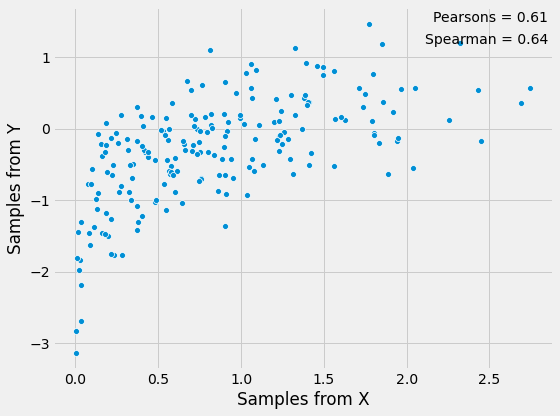

In [97]:
import scipy.stats

fig,ax = plt.subplots()

xs = []
for n in range(200):
    x=-1
    while x<0:
        x = np.random.normal(0,1)
    xs.append(x)
ys = 0.5*np.array([ np.log(x) for x in xs]) + np.random.normal(0,0.5,200)

sns.scatterplot(xs,ys,ax=ax)

r,p = scipy.stats.pearsonr(xs,ys)
s,p = scipy.stats.spearmanr(xs,ys)

ax.text(0.99,0.99,s="Pearsons = {:.2f}".format(r),ha="right",va="top",transform=ax.transAxes)
ax.text(0.99,0.93,s="Spearman = {:.2f}".format(s),ha="right",va="top",transform=ax.transAxes)

ax.set_xlabel("Samples from X")
ax.set_ylabel("Samples from Y")

fig.set_tight_layout(True)
fig.set_size_inches(8,6)

### 2X2 tables

The 2 X 2 table (sometimes call the cross tabulations) is a classic statistical tool for computing association between categorical random variables.
We can compute several different statistics using the 2 X 2 table and assess whether or not two random variables are correlated or associated with one another.

#### Construction

A 2 X 2 table is built by first finding the number of categories possible for th r.v. $X$ and for the r.v. $Y$.
Then build an empty table where the number of rows is the number of categories of $X$ and where the number of columns is the number of categories of $Y$. For example, if there are 3 possible values of $X$ and 4 possible values of $Y$ then our table is 

\begin{align}
    \left[ \begin{array}{c|cccc}
         & &   & Y &   & \\
         \hline
         & & A & B & C & D \\
          & E &  - & - & - & -\\
        X& F & - & - & - & -\\
         & G  & - & - & - & -\\
     \end{array} \right]
\end{align}


counting the number of co-occurances of 

#### How to compute expected values
#### Goodness of fit and O-E
#### Chisquare distribution and pvalue

### Simple linear regression
#### Probabilistic and model form
#### LINE assumptions
#### Expected value
#### Computing $b_{0}$ and $b_{1}$